<hr id="import">

<h2>1. Data Collection</h2>

Import the `Pandas` library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data from `data.csv` into a `Pandas DataFrame`

In [42]:
df=pd.read_csv(r'C:\Users\Halawany Laptop\Desktop\data science\water treatment.csv')
df.head()

,dayw,frw,pw
0,1.0,608.0,235.414640
1,2.0,621.0,219.771235
2,3.0,504.0,303.435899
3,4.0,766.0,181.858942
4,5.0,707.0,197.587465


<hr id="clean">

<h2>2. Data Cleaning and Preparation</h2>

<h5 id="clean-missing">Handle missing values</h5>

Identify missing values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dayw    248 non-null    float64
 1   frw     248 non-null    float64
 2   pw      248 non-null    float64
dtypes: float64(3)
memory usage: 9.7 KB


In [44]:
df.isna().sum()

dayw    161
frw     161
pw      161
dtype: int64

In [45]:
df.dropna(inplace=True)
df.head()

,dayw,frw,pw
0,1.0,608.0,235.414640
1,2.0,621.0,219.771235
2,3.0,504.0,303.435899
3,4.0,766.0,181.858942
4,5.0,707.0,197.587465


<h5 id="clean-duplicates">Remove duplicates</h5>

In [46]:
df.duplicated().sum()

0

In [47]:
df.drop_duplicates(inplace=True)
df

,dayw,frw,pw
0,1.0,608.0,235.414640
1,2.0,621.0,219.771235
2,3.0,504.0,303.435899
3,4.0,766.0,181.858942
4,5.0,707.0,197.587465
...,...,...,...
243,244.0,550.0,186.657075
244,245.0,804.0,100.940065
245,246.0,801.0,105.544467
246,247.0,661.0,136.385529


Standardize data

In [48]:
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

<h5>Validate cleaned data</h5>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dayw    248 non-null    float64
 1   frw     248 non-null    float64
 2   pw      248 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


In [50]:
df.duplicated().sum()

0

<h5>Create extra required features</h5>

In [51]:
inpower=50
tothead=df['pw']+24/0.434
outpower=(df['frw']*tothead)/3960
df['effw'] = (outpower/inpower)
df.head()

,dayw,frw,pw,effw
0,1.0,608.0,235.414640,0.892698
1,2.0,621.0,219.771235,0.862722
2,3.0,504.0,303.435899,0.913145
3,4.0,766.0,181.858942,0.917492
4,5.0,707.0,197.587465,0.902985


<hr id="eda">

<h2>3. Exploratory Data Analysis</h2>

<h5>Descriptive Analysis</h5>

In [52]:
df_desc = df.describe()
df_desc

,dayw,frw,pw,effw
count,248.000000,248.000000,248.000000,248.000000
mean,124.500000,691.822581,172.688089,0.775501
std,71.735626,113.334877,43.593958,0.073771
min,1.000000,501.000000,94.388840,0.634427
25%,62.750000,592.750000,142.537567,0.716526
50%,124.500000,684.000000,167.357302,0.773387
75%,186.250000,797.500000,202.688526,0.832956
max,248.000000,895.000000,303.435899,0.921905


<h5>Visualize Parameters and identify outliers</h5>

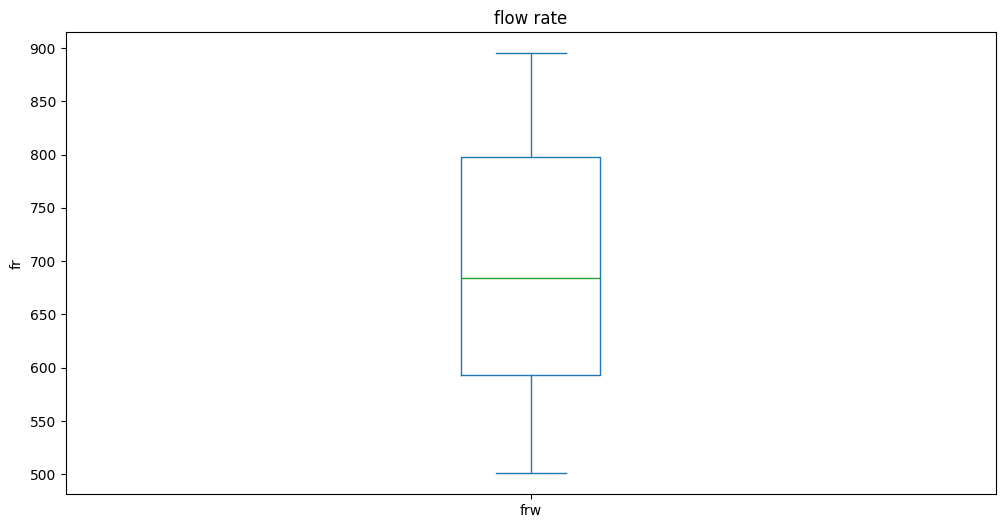

In [53]:
df['frw'].plot(kind='box', figsize=(12, 6), title='flow rate', ylabel='fr')
plt.show()

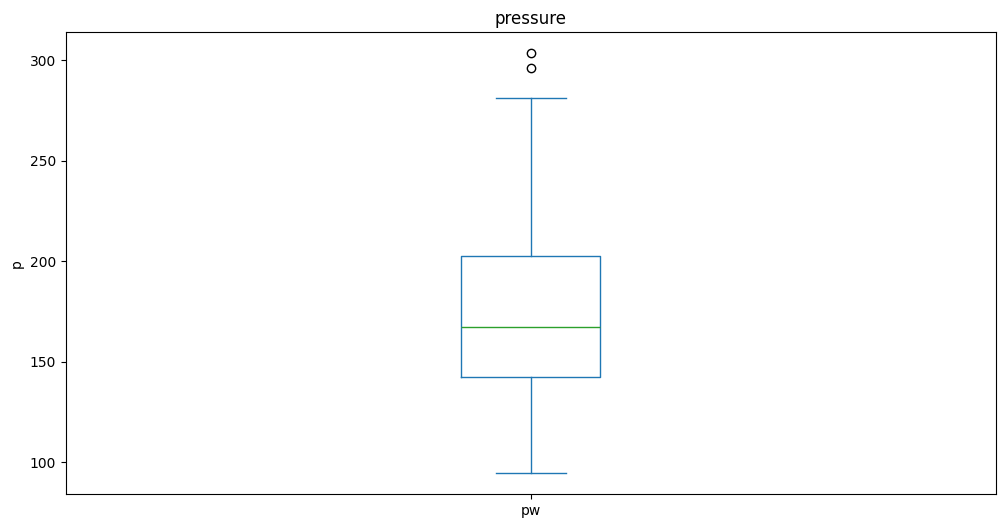

In [54]:
df['pw'].plot(kind='box', figsize=(12, 6), title='pressure', ylabel='p')
plt.show()

Remove outliers

In [55]:
iqr = df_desc.loc['75%', 'pw'] - df_desc.loc['25%', 'pw']
upper_bound = df_desc.loc['75%', 'pw'] + 1.5 * iqr
lower_bound = df_desc.loc['25%', 'pw'] - 1.5 * iqr
df = df[(df['pw'] < upper_bound) & (df['pw'] > lower_bound)]

Remove impractical entries

In [56]:
df[df['frw'] < 0 ]
df[df['pw'] < 0 ]

,dayw,frw,pw,effw


<hr id="model">

<h2>4. Model Development and Evaluation</h2>

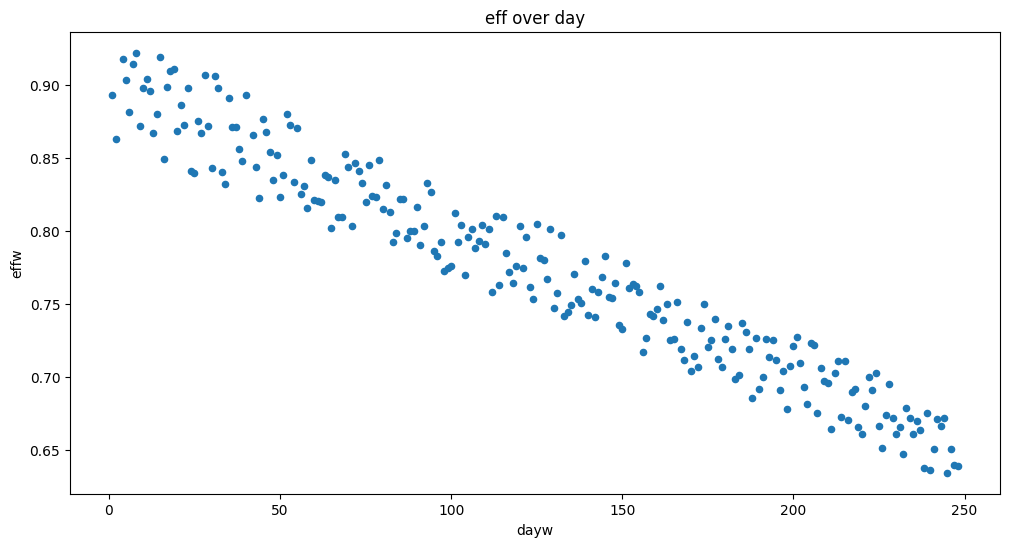

In [57]:
df.plot(kind='scatter', x='dayw', y='effw', figsize=(12, 6), title='eff over day')
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()


X = df[['effw']]
Y = df['dayw']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [-946.26566791]
Intercept: 
 858.629439261633


In [59]:
maitenve_day= lr.predict([[0.6]])
maitenve_day

c:\Users\Halawany Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([290.87003851])